In [384]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/Housing.csv


In [385]:

df = pd.read_csv("/kaggle/input/housing/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [386]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [387]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [388]:
df.shape

(545, 13)

<Axes: >

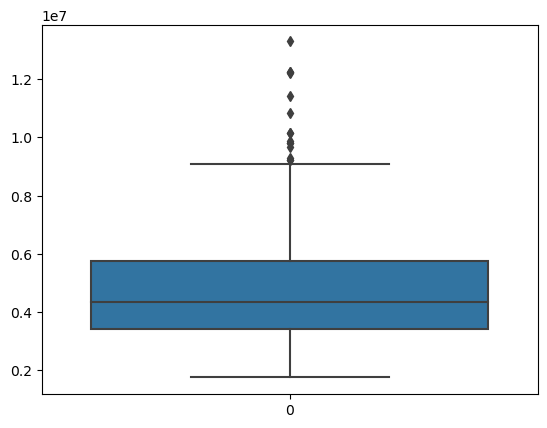

In [389]:
import seaborn as sns
sns.boxplot(df['price'])

In [390]:
df.shape

(545, 13)

In [391]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['price']>=upper)[0]
lower_array = np.where(df['price']<=lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [392]:
X = pd.DataFrame(df.iloc[:,1:4])
Y = pd.DataFrame(df.iloc[:,0])


In [393]:
X

,area,bedrooms,bathrooms
15,6000,4,1
16,6600,4,2
17,8500,3,2
18,4600,3,2
19,6420,3,2
...,...,...,...
540,3000,2,1
541,2400,3,1
542,3620,2,1
543,2910,3,1


In [394]:
Y

,price
15,9100000
16,9100000
17,8960000
18,8890000
19,8855000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [395]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5)

In [396]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(424, 3)
(424, 1)
(106, 3)
(106, 1)


In [397]:
from sklearn.linear_model import LinearRegression

Regressor = LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression()

In [398]:
y_pred = Regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y1_pred = np.array(y_pred)
Y1_test = np.array(Y_test)
print(round(y_pred, 0))

     Predicted
0    3816206.0
1    4061423.0
2    3942220.0
3    4565482.0
4    4078452.0
..         ...
101  5273956.0
102  4214684.0
103  5003717.0
104  4127247.0
105  4978697.0

[106 rows x 1 columns]


In [399]:
from sklearn import metrics

print('MEAN ABSOLUTE ERROR:', metrics.mean_absolute_error(Y_test,y_pred))
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(Y_test,y_pred))
print('ROOT MEAN SQUARED ERROR:', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MEAN ABSOLUTE ERROR: 829724.1136259201
MEAN SQUARED ERROR: 1107061365678.6047
ROOT MEAN SQUARED ERROR: 1052169.8368983045
